<a href="https://colab.research.google.com/github/laharikothamasu/customer-segmentation-kmeans/blob/main/Customer_Clustering_with_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Install Necessary Libraries (if not pre-installed in Colab):

Colab already includes many libraries, but to ensure everything works, run

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Step 2: Load and Inspect the Dataset
Run the following steps to load and explore your dataset:

Import Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset:

In [ ]:
df = pd.read_csv("customers.csv")  # Replace with the correct file name if needed


Preview the Data:

In [ ]:
df.head()  # View the first 5 rows
df.info()  # Check data types and missing values
df.describe()  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Exploration (EDA)
Let’s start by exploring the dataset to understand its structure and identify any potential issues.

1. Check Dataset Structure
Run these commands in your Colab notebook to get an overview:

In [ ]:
# Check the structure of the dataset
df.info()

# Display the first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Visualize Data Distribution
We’ll look at how key features like Age, Annual Income, and Spending Score are distributed.

python
Copy code


<Axes: xlabel='Age', ylabel='Count'>

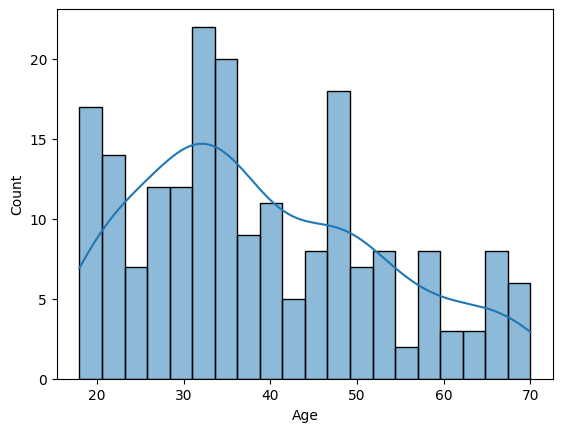

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
sns.histplot(df['Age'], kde=True, bins=20)


Data Cleaning
Here’s what we’ll do next:

1. Handle Missing Values
If there are any missing values (from df.isnull().sum()), we can either drop the rows/columns or fill them with appropriate values.
Apply fillna() Only to Numeric Columns
Explanation
df.select_dtypes(include='number'): Selects only numeric columns in the dataset.
median(): Calculates the median for these numeric columns.
fillna(): Fills missing values in numeric columns with the median.

In [ ]:

# Fill missing values for numeric columns only
df.fillna(df.select_dtypes(include='number').median(), inplace=True)



Handling Non-Numeric Columns (Optional)
If there are missing values in non-numeric columns like Gender, you can fill them separately using a different strategy:

For categorical columns, use the mode (most frequent value):
python
Copy code


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


<ipython-input-12-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


Feature Selection
For customer segmentation, focus on the most relevant features: Age, Annual Income (k$), and Spending Score (1-100).

In [ ]:
# Selecting relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


Scaling the Data
Clustering algorithms like K-Means work better with scaled data. We’ll standardize the selected features to have mean = 0 and standard deviation = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


Apply K-Means Clustering
Now, let's cluster the data using the K-Means algorithm.

Import the K-Means module and create the model:

In [ ]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled features
kmeans.fit(features_scaled)


KMeans(n_clusters=3, random_state=42)

Add the cluster labels to your dataset:

python
Copy code


In [ ]:
# Add the cluster labels as a new column
df['Cluster'] = kmeans.labels_


Visualizing the Clusters
Plot the Clusters in 2D: We’ll use Annual Income and Spending Score for visualization (since these are the most interpretable features).

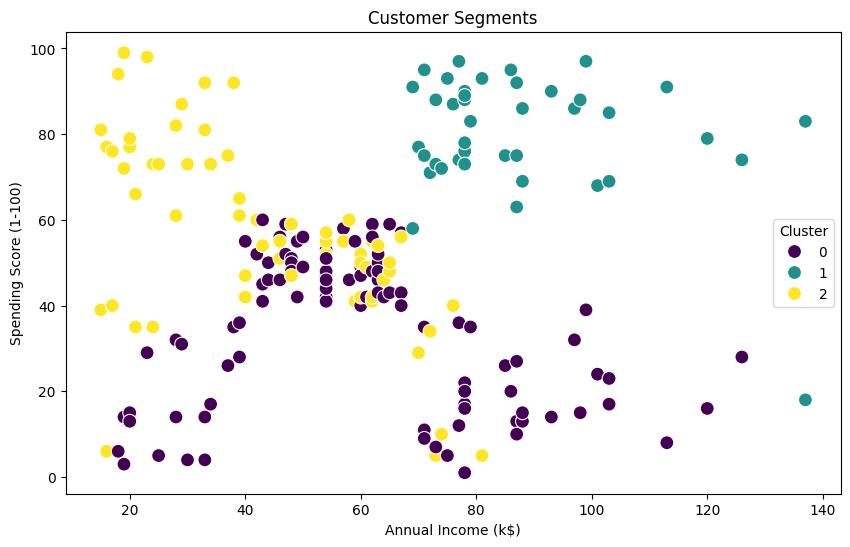

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map clusters to colors for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features['Annual Income (k$)'],
    y=features['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()


Analyze the Results:
Look for patterns in the clusters.
For example:
High income + high spending = likely premium customers.
Low income + low spending = budget-conscious customers.

Save the Clustered Data
You can save the dataset with cluster labels for future use or reporting:

In [ ]:
# Save the dataset with clusters to a new CSV file
df.to_csv("customer_segments_with_clusters.csv", index=False)


Analyze and Interpret the Clusters
Look at the scatter plot and analyze the clusters:

How many clusters are there? (Should be 3, as per the n_clusters value in K-Means.)
What do the clusters represent?
Example:
Cluster 0: Low income, low spending (Budget Customers).
Cluster 1: High income, high spending (Premium Customers).
Cluster 2: Moderate income, moderate spending (Average Customers).

Extend the Analysis
Here are some additional ideas to enhance your project:

Elbow Method to Optimize Clusters: Determine the optimal number of clusters using the Elbow Method.

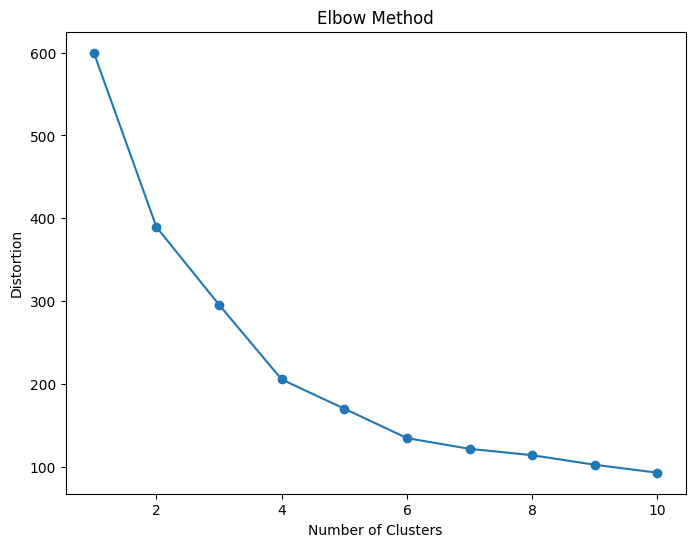

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()


Profile the Clusters: Calculate the average values for Age, Annual Income, and Spending Score for each cluster.

In [ ]:
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profiles)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        50.406250           60.468750               33.343750
1        32.853659           87.341463               79.975610
2        25.142857           43.269841               56.507937


Visualize More Dimensions: Use pair plots or 3D scatter plots if you want to explore more relationships.

In [ ]:
df.to_csv('customer_segments_with_clusters.csv', index=False)


In [ ]:
from google.colab import files
files.download('customer_segments_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>